In [ ]:
# Import necessary libraries

import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

Les données d'entrée https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer


In [ ]:
# Define the directory containing the image data

directory = "C:/Users/salma/Documents/data/test"

# Define the emotion classes

Classes = ["surprised", "sad", "neutral", "happy", "fearful", "angry", "disgusted"]

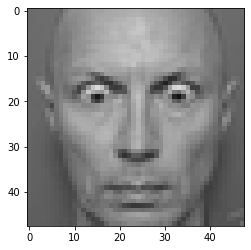

In [ ]:
# Display a sample image for each emotion class

for category in Classes:
    path = os.path.join(directory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

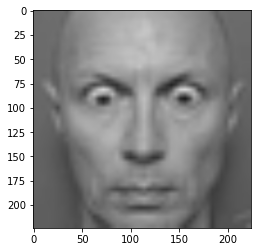

In [ ]:
# Set the image size for resizing
img_size = 224
# Resize and display a sample image
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Display the shape of the resized image
new_array.shape

(224, 224, 3)

In [ ]:
# Create a list to store training data
training_data = []

# Function to create training data from images
def create_training_data():
    print("Creating")
    for category in Classes:
        path = os.path.join(directory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
# Call the function to create training data
create_training_data()

Creating


In [ ]:
# Display the number of training samples
print(len(training_data))

28709


In [ ]:
# Convert training data to a numpy array
temp = np.array(training_data, dtype=object)

In [ ]:
# Display the shape of the numpy array
temp.shape

In [ ]:
# Shuffle the training data
import random

random.shuffle(training_data)

In [ ]:
# Separate features and labels
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

# Convert features to a numpy array
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
print(X.shape)

In [ ]:
# Normalize the features
X = X/255

In [ ]:
# Convert labels to a numpy array
Y = np.array(y)

In [ ]:
# Display the shape of features and labels
print(Y.shape)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Load the MobileNetV2 model for transfer learning

model=tf.keras.applications.MobileNetV2()
model.summary()

In [ ]:
# Extract input and output layers from the pre-trained model

base_input =model.layers[0].input ## input
base_output= model.layers[-2].output
base_output

In [ ]:
final_output=layers.Dense (128) (base_output) ## adding new Layer, after the output of global pooling Layer
final_ouput=layers.Activation ('relu') (final_output) ## activation function
final_output=layers.Dense (64) (final_ouput)
final_ouput=layers.Activation( 'relu') (final_output)
final_output=layers.Dense (7, activation='softmax') (final_ouput) ## my classes are 07

final_output ## ouput

In [ ]:
# Create a new model with the added layers
new_model =keras.Model(inputs=base_input, outputs=final_output)

# Display the summary of the new model
new_model.summary()

In [ ]:
# Compile the new model
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

# Train the model
new_model.fit(X, Y, epochs = 25) ## training

In [ ]:
# Save the trained model
new_model.save('Final_model_95p07.h5')

In [ ]:
# Load the saved model
new_model = tf.keras.models.load_model('Final_model_95p07.h5')

In [ ]:
# Read an image for emotion prediction
frame = cv2.imread("C:/Users/salma/OneDrive/Images/salma/360_F_342851651_BV9SYWnoTPSu3kq6e82zG7H8eEt20wd1.jpg")
frame.shape

(360, 540, 3)

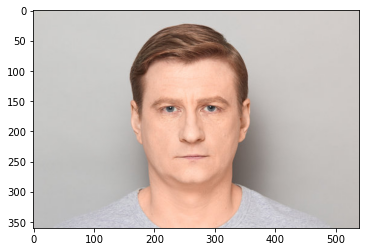

In [ ]:
# Display the input image
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 122ms/step
[1.7767516e-03 8.7571427e-02 3.3847168e-02 3.7226346e-04 1.3284785e-01
 7.4116832e-01 2.4162435e-03]
Angry


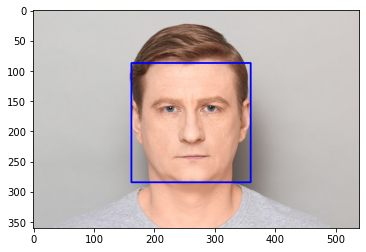

In [ ]:


# Load the cascade classifier
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convert the image to grayscale
gray = cv2.cvtColor (frame, cv2.COLOR_BGR2GRAY)

gray.shape

# Detect faces in the image
faces=faceCascade.detectMultiScale (gray,1.1,4)

# Process each detected face

for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=frame [y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
           print("Face not detected")
    else:
          for (ex, ey, ew, eh) in facess:
                  face_roi=roi_color[ey: ey+eh, ex:ex + ew]

# Display the processed image
plt.imshow(cv2.cvtColor (frame, cv2.COLOR_BGR2RGB))


# Resize and prepare the face image for prediction
final_image=cv2.resize(face_roi, (224,224)) ##
final_image=np.expand_dims (final_image, axis =0) ## need fourth dimension final_image=final_image/255.0 ## normalizing

# Make emotion predictions
Predictions=new_model.predict(final_image)

# Display the predicted emotion
print(Predictions[0])

# Map the predicted index to the corresponding emotion
if np.argmax(Predictions) == 0:
    status = "Surprised"
elif np.argmax(Predictions) == 1:
    status = "Sad"
elif np.argmax(Predictions) == 2:
    status = "Neutral"
elif np.argmax(Predictions) == 3:
    status = "Happy"
elif np.argmax(Predictions) == 4:
    status = "Fearful"
elif np.argmax(Predictions) == 5:
    status = "Angry"
elif np.argmax(Predictions) == 6:
    status = "Disgusted"

# Display the predicted emotion
print(status)

In [ ]:
frame = cv2.imread("C:/Users/salma/OneDrive/Images/salma/thomas-ruff-portraits.png")
frame.shape

(693, 500, 3)

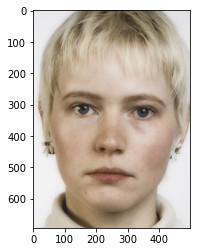

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 91ms/step
[9.5573306e-04 6.9330108e-01 1.5419349e-01 1.4974810e-02 1.5269011e-02
 1.2062482e-01 6.8104645e-04]
Sad


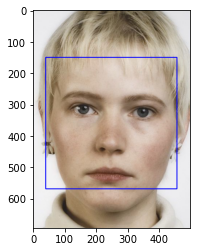

In [ ]:

# Load the cascade classifier
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

gray = cv2.cvtColor (frame, cv2.COLOR_BGR2GRAY)

gray.shape

faces=faceCascade.detectMultiScale (gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=frame [y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
           print("Face not detected")
    else:
          for (ex, ey, ew, eh) in facess:
                  face_roi=roi_color[ey: ey+eh, ex:ex + ew]

plt.imshow(cv2.cvtColor (frame, cv2.COLOR_BGR2RGB))


final_image=cv2.resize(face_roi, (224,224)) ##
final_image=np.expand_dims (final_image, axis =0) ## need fourth dimension final_image=final_image/255.0 ## normalizing

Predictions=new_model.predict(final_image)

print(Predictions[0])

if np.argmax(Predictions) == 0:
    status = "Surprised"
elif np.argmax(Predictions) == 1:
    status = "Sad"
elif np.argmax(Predictions) == 2:
    status = "Neutral"
elif np.argmax(Predictions) == 3:
    status = "Happy"
elif np.argmax(Predictions) == 4:
    status = "Fearful"
elif np.argmax(Predictions) == 5:
    status = "Angry"
elif np.argmax(Predictions) == 6:
    status = "Disgusted"

print(status)